In [40]:
import scanpy as sc
import numpy as np
import pandas as pd

In [41]:
adata = sc.read_10x_mtx(
    'C:/Users/Computer/Desktop/pbmc3k_filtered_gene_bc_matrices.tar/pbmc3k_filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)   

x = adata._X.todense()

In [42]:
x.shape #shape of the data

(2700, 32738)

#                                                                Marker Genes
### Genes we want to filter to characterize cell types
|Cell type | gene name|
|----------|----------|
|native CD4+ T-Cells|IL7R, CCR7|
|Memory T-Cells CD4+| ILR7, S100A4|
|Natural Killer Cells|GNLY, NKG7|
|B-Cells|MS4A1|
|CD8+ T-Cells|CD88A|
|FCGR3A+ Monocytes| FCGR3A, MS4A7|
|CD14+ Monocytes|CD14, LYZ|
|Dendritic Cells| FCER1A, CST3|
|Platelets| PBPP|

In [43]:
marker_genes = ['IL7R','CCR7','ILR7','S100A4','GNLY','NKG7','MS4A1','CD88A',
                'FCGR3A','MS4A7','CD14','LYZ','FCER1A','CST3','PBPP']
#create a list with all marker genes

In [44]:
x

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
print(marker_genes)

['IL7R', 'CCR7', 'ILR7', 'S100A4', 'GNLY', 'NKG7', 'MS4A1', 'CD88A', 'FCGR3A', 'MS4A7', 'CD14', 'LYZ', 'FCER1A', 'CST3', 'PBPP']


In [46]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

In [47]:
import anndata as ad

In [48]:
data = pd.DataFrame(x) #transformation of whatever x is into a dataframe

In [49]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32728,32729,32730,32731,32732,32733,32734,32735,32736,32737
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
adata.var_names_make_unique()

In [51]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

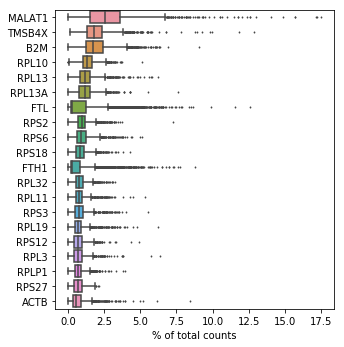

In [52]:
sc.pl.highest_expr_genes(adata,n_top = 20)

In [53]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

In [54]:
x

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
sc.pp.normalize_per_cell(adata,counts_per_cell_after=1e4) #normalization of counts on 1000

In [56]:
sc.pp.filter_cells(adata,min_genes=200)#filter cells with minimum 200 expressed genes

In [57]:
sc.pp.filter_genes(adata,min_cells=3) #filter genes with at least 3 cells the genes are expressed in

In [58]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714 
    obs: 'n_counts', 'n_genes'
    var: 'gene_ids', 'n_cells'

In [59]:
#noch die Mitochondriale DNA überprüfen -> Qualitätskontrolle; 
#nachlesen was welcher Wert über die Datenqualität aussagt
#schlechte Zellen aussortieren


# PCA (principal component analysis)
denoising data, showing principal axes

In [60]:
sc.tl.pca(adata,svd_solver='arpack') #arpack is a package designed to perform PCA for large matrices

In [61]:
adata.shape

(2700, 13714)

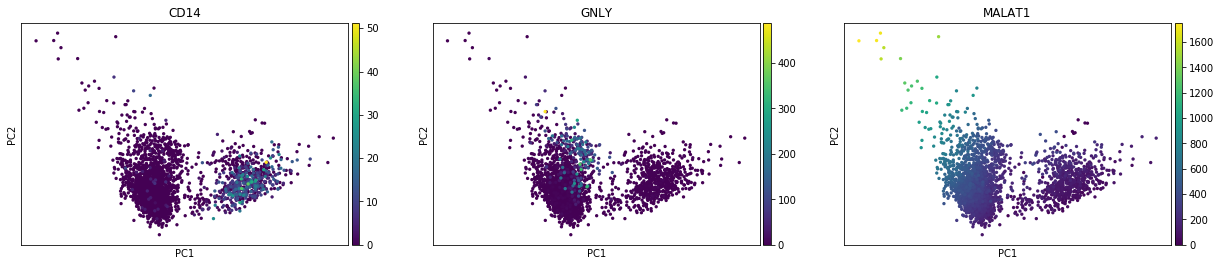

In [62]:
sc.pl.pca(adata,color=['CD14','GNLY','MALAT1']) # visualizing data in PCA

In [63]:
# das Verhältnis zwischen normaler RNA und mitochondrialer DNA sagt etwas über die Integrität der Zellen aus: 
# Wenn zu viel mtDNA vorhanden ist, dann ist die Zelle wahrscheinlich beschädigt
#daher filtern wir die Zellen raus, in denen das Verhältnis verschoben ist
mtgenes = adata.var_names.str.startswith('MT-')
# das Verhältnis zwischen der mtDNA und der RNA muss berechnet werden
print(mtgenes)

[False False False ... False False False]


In [64]:
mtgenes

array([False, False, False, ..., False, False, False])

In [65]:
adata.obs['mito_percent'] = np.sum(adata[:,mtgenes].X, axis = 1).A1/np.sum(adata.X, axis = 1).A1

In [66]:
adata.obs['n_counts']=adata.X.sum(axis=1).A1

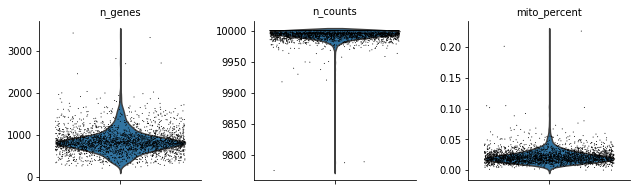

In [78]:
sc.pl.violin(adata,['n_genes','n_counts','mito_percent'],jitter=0.4, multi_panel=True)